In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = pd.read_csv('customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
y = data['Churn']
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges']]

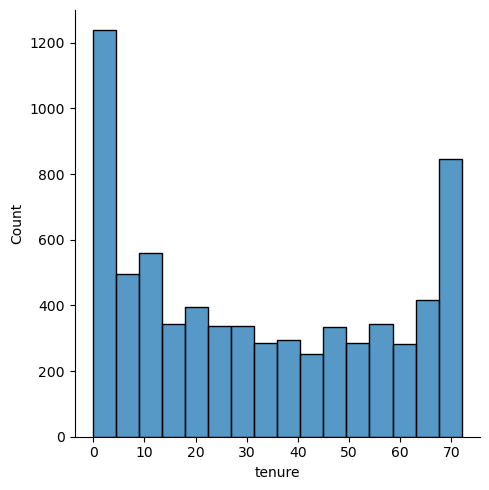

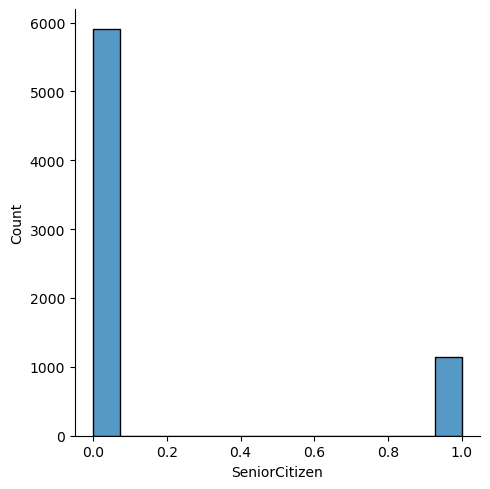

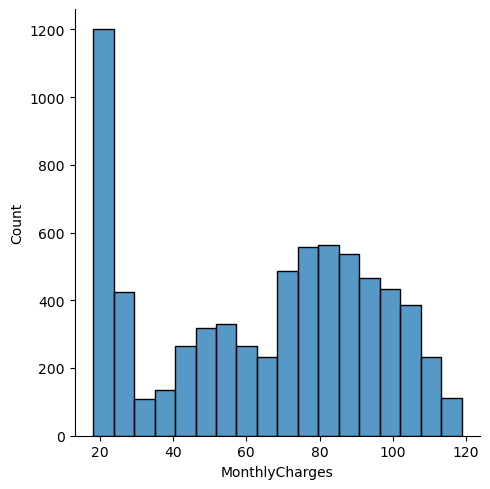

In [7]:
#Check distributions of numerical features
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(df,):
    for col in X:
        sns.displot(df[col])
        plt.show()

plot_distributions(data)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
X_train_num = X_train.select_dtypes(include = np.number)
# Scaling numerical data
transformer = MinMaxScaler().fit(X_train)
X_train_normalized = transformer.transform(X_train)
X_train_norm = pd.DataFrame(X_train_normalized)
X_train_norm.columns = X_train.columns
X_train_norm.describe()
transformer = MinMaxScaler().fit(X_test)
X_test_normalized = transformer.transform(X_test)
X_test_norm = pd.DataFrame(X_test_normalized)
X_test_norm.columns = X_test.columns
X_test_norm.describe()

,tenure,SeniorCitizen,MonthlyCharges
count,1761.000000,1761.000000,1761.000000
mean,0.450809,0.170358,0.463387
std,0.342667,0.376054,0.303334
min,0.000000,0.000000,0.000000
25%,0.125000,0.000000,0.165919
50%,0.402778,0.000000,0.519183
75%,0.763889,0.000000,0.715994
max,1.000000,1.000000,1.000000


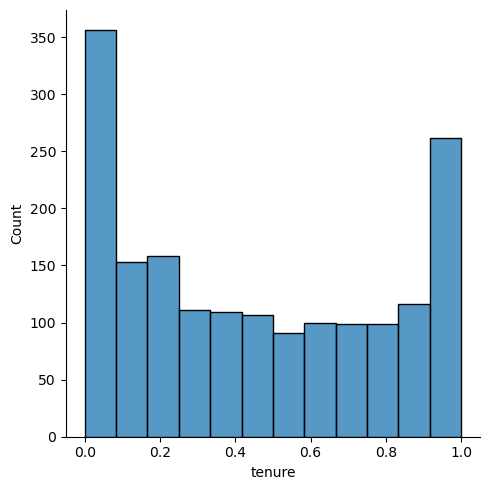

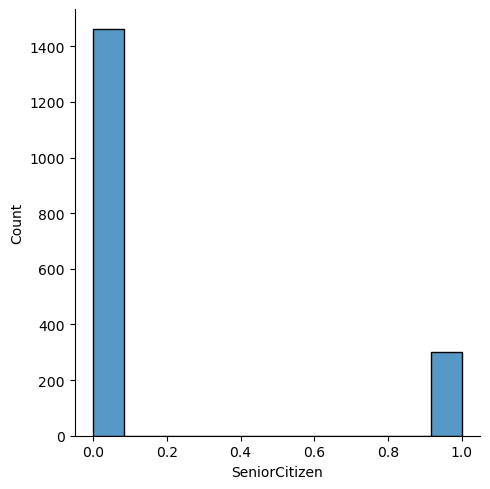

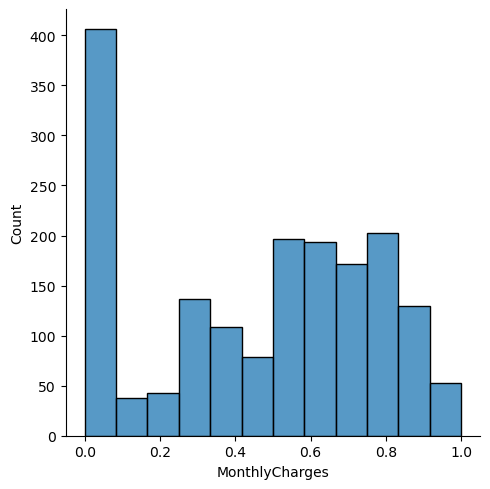

In [29]:
def plot_distributions(df,):
    for col in X_test_norm:
        sns.displot(df[col])
        plt.show()

plot_distributions(X_test_norm)

In [30]:
tr_lr = LogisticRegression(random_state=0, solver='lbfgs')
tr_lr.fit(X_train_norm, y_train)

LogisticRegression(random_state=0)

In [32]:
train_predictions=tr_lr.predict(X_train_norm) 

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

print("The accuracy in the TRAIN set is: {:.2f}".format(accuracy_score(y_train,train_predictions)))
print("The precision in the TRAIN set is: {:.2f}".format(precision_score(y_train,train_predictions, average="binary", pos_label='Yes')))
print("The recall in the TRAIN set is: {:.2f}".format(recall_score(y_train,train_predictions, average="binary", pos_label='Yes')))
print("The F1 in the TRAIN set is: {:.2f}".format(f1_score(y_train,train_predictions, average="binary", pos_label='Yes')))
print("The Kappa in the TRAIN set is: {:.2f}".format(cohen_kappa_score(y_train,train_predictions)))



The accuracy in the TRAIN set is: 0.79
The precision in the TRAIN set is: 0.66
The recall in the TRAIN set is: 0.46
The F1 in the TRAIN set is: 0.55
The Kappa in the TRAIN set is: 0.42


In [59]:
te_lr = LogisticRegression(random_state=0, solver='lbfgs')
te_lr.fit(X_train_norm, y_train)

LogisticRegression(random_state=0)

In [60]:
test_predictions=te_lr.predict(X_test_norm) 

In [37]:
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,test_predictions)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,test_predictions, average="binary", pos_label='Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,test_predictions, average="binary", pos_label='Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,test_predictions, average="binary", pos_label='Yes')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,test_predictions)))


The accuracy in the TEST set is: 0.78
The precision in the TEST set is: 0.61
The recall in the TEST set is: 0.46
The F1 in the TEST set is: 0.52
The Kappa in the TEST set is: 0.38


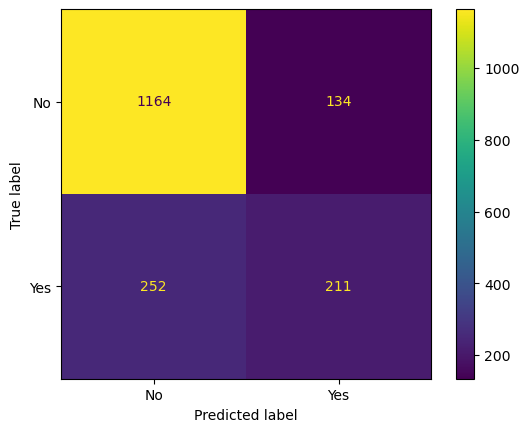

In [46]:
#Confusion matrix
from sklearn.metrics import cohen_kappa_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test, test_predictions)
disp_test=ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=te_lr.classes_)
disp_test.plot()
plt.show()

In [84]:
# A simple model will always give more than 70% accuracy because data is heavily imbalanced.

In [51]:
from imblearn.over_sampling import SMOTE

In [54]:
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_norm,y_train)

In [62]:
print(X_train.shape)
print(X_train_SMOTE.shape)
y_train_SMOTE.value_counts()

(5282, 3)
(7752, 3)


No     3876
Yes    3876
Name: Churn, dtype: int64

In [68]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_norm)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, average="binary", pos_label='Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, average="binary", pos_label='Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, average="binary", pos_label='Yes')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.48
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.57
The Kappa in the TEST set is: 0.38


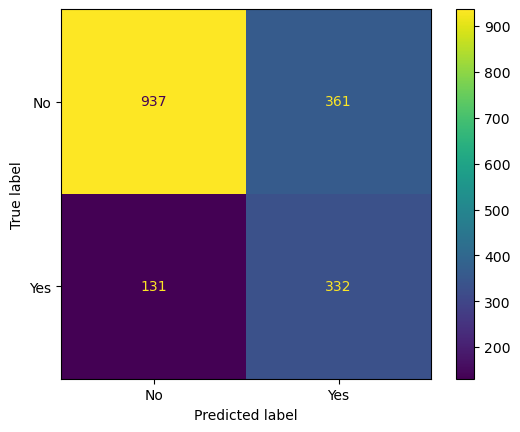

In [69]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()